# Graphiques par type de variables

### Importation des packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### importation des data set

In [2]:
#base de données titanic
titanic = sns.load_dataset("titanic")
#base de données tips
tip = sns.load_dataset("tips")
#base de données iris
iris = sns.load_dataset("iris")

### Représentation graphique pour variable quantitative 

##### Le Diagramme à barre

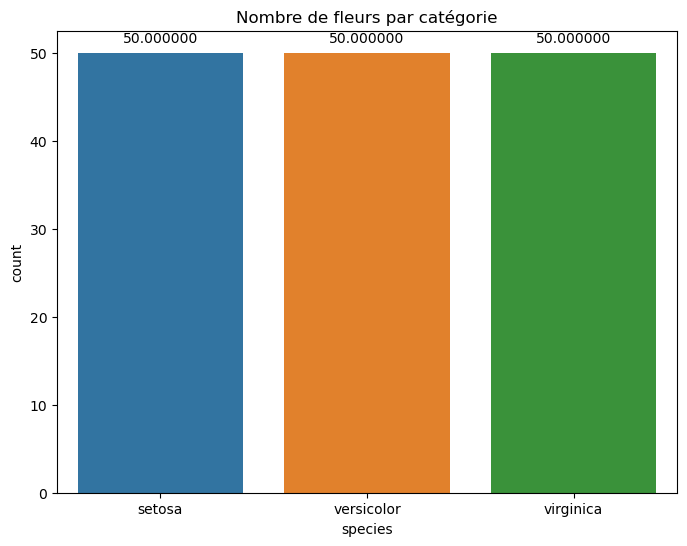

In [3]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "species", data = iris)
plt.title("Nombre de fleurs par catégorie")

#Ajouter le nombre de chaque catégorie sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), "0f"), (p.get_x()+p.get_width()/2., p.get_height()),
               ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points");

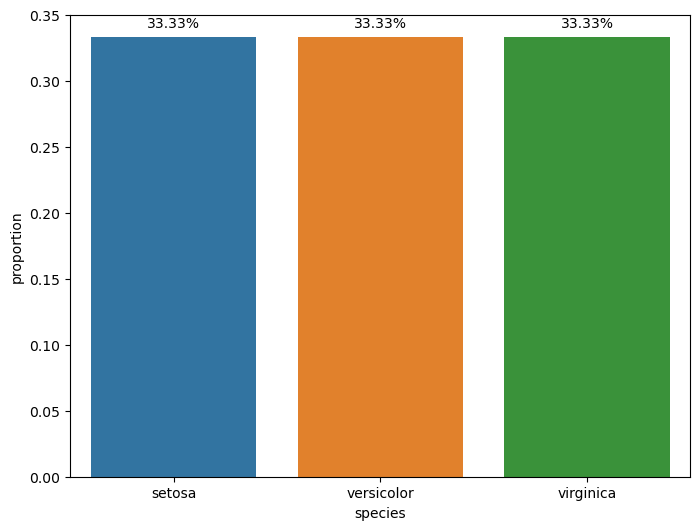

In [4]:
#Proportion pour chaque catégorie
prop = iris["species"].value_counts(normalize = True). reset_index()
prop.columns = ["species", "proportion"]
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = "species", y = "proportion", data = prop)

#ajout des proportions sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x()+p.get_width()/2.,p.get_height()),
               ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points");

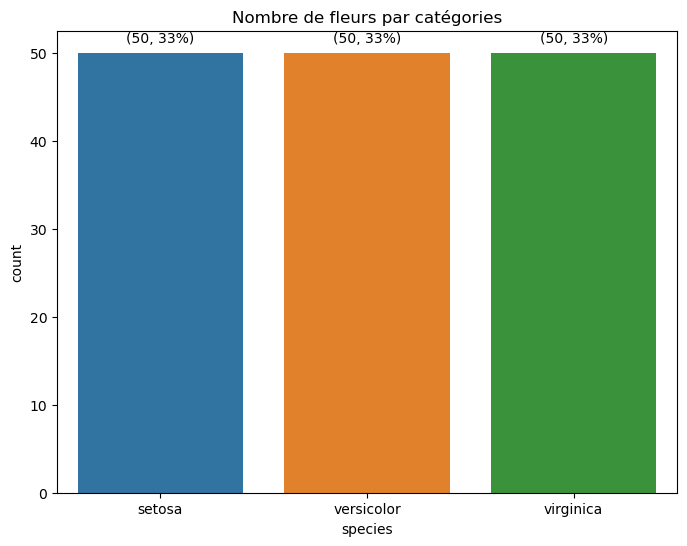

In [5]:
#graphique à barre pour la proportion de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = iris["species"].value_counts(normalize = True).reset_index()
prop.columns = ["species", "proportion"]

#taille du graphe
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "species", data = iris)
plt.title("Nombre de fleurs par catégories")

#ajout du nombre et de la proportion des fleurs par catégorie
for p, prop, count in zip(ax.patches, prop["proportion"], iris["species"].value_counts().sort_index()):
    ax.annotate(f'({count}, {prop:.0%})', (p.get_x()+p.get_width()/2., p.get_height()),
               ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points");

#### Graphique en secteur ou pie chart

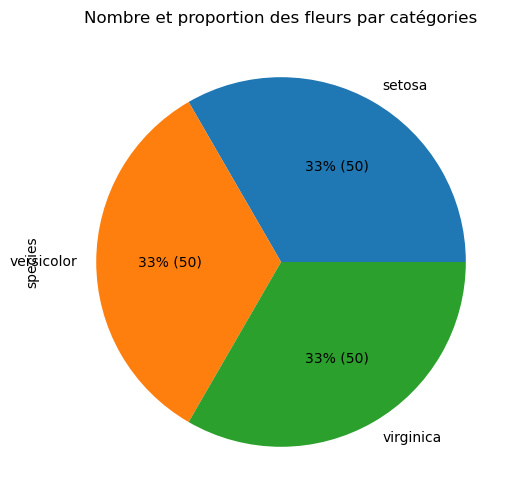

In [6]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = iris["species"].value_counts().reset_index()
prop.columns = ["species", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = iris["species"].value_counts().plot(kind = "pie", autopct = lambda x: f'{x:.0f}% ({x/100*len(iris):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des fleurs par catégories");

### Diagramme pour variable qualitative

In [7]:
#creation d'une variable qualitative ordinale
ordinal = tip["size"]

#### Diagramme en baton 

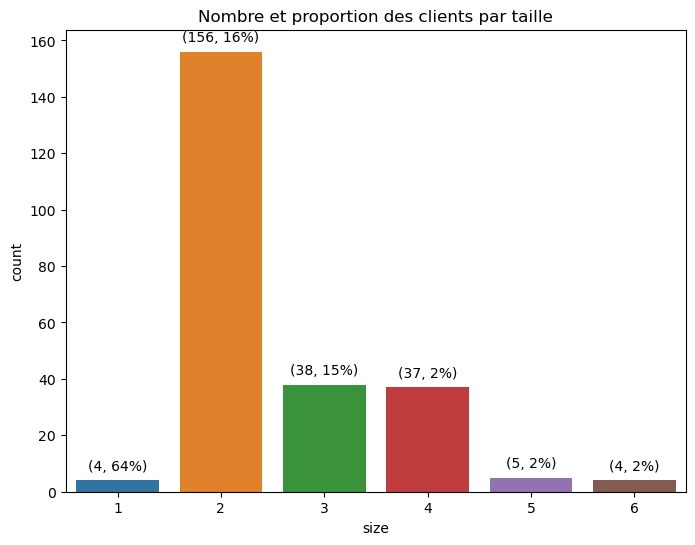

In [8]:
prop = tip["size"].value_counts(normalize = True).reset_index()
prop.columns = ["size", "proportion"]

#graphique à barre pour la fréquence de chaque catégorie
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "size", data = tip)
plt.title("Nombre et proportion des clients par taille")

#ajouter le nombre et la proportion de chaque catégorie sur la barres
for p, prop, count in zip(ax.patches, prop["proportion"], tip["size"].value_counts().sort_index()):
    ax.annotate(f'({count}, {prop:.0%})', (p.get_x()+p.get_width()/2., p.get_height()),
               ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points");

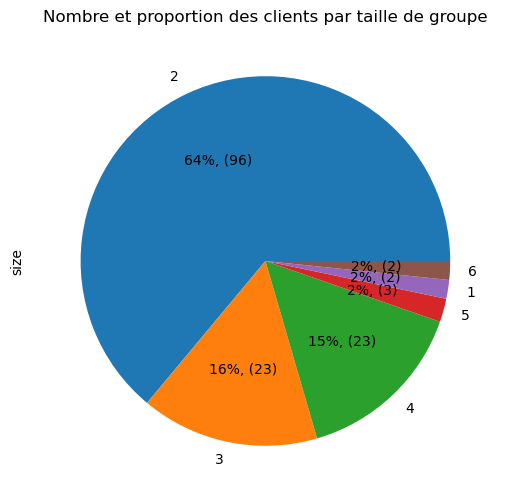

In [9]:
#on peut faire les boxplot uniquement lorsque les variables ont entre 3 et 7 modalités maximum

#calcul de la proportion de chaque catégorie
prop = tip["size"].value_counts(normalize = True).reset_index()
prop.columns = ["size", "proportion"]

#graphique en secteur pour la fréquence de chaque catégorie
plt.figure(figsize = (8, 6))
ax = tip["size"].value_counts().plot(kind = "pie", autopct = lambda x: f'{x:.0f}%, ({x/100*len(iris):.0f})')

plt.title("Nombre et proportion des clients par taille de groupe");

### Graphiques adaptés pour les variables continues

#### Graphiques pour variables discrètes

#### Histogramme

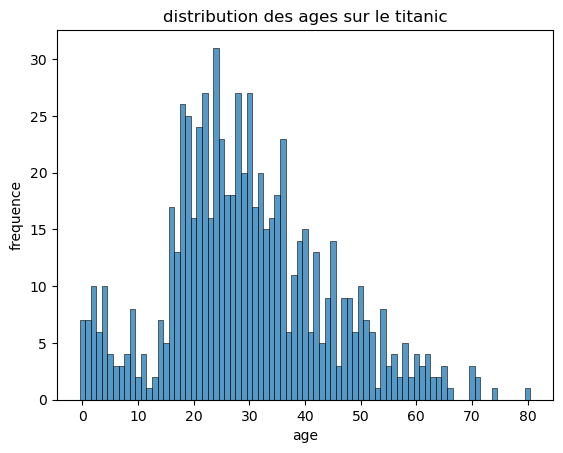

In [10]:
# creation d'une variable quantitative discrète
age = titanic["age"].dropna().astype(int)

#creation de l'histogramme
sns.histplot(x = age, discrete = True)
plt.title("distribution des ages sur le titanic")
plt.xlabel("age")
plt.ylabel("frequence");

#### Boxplot

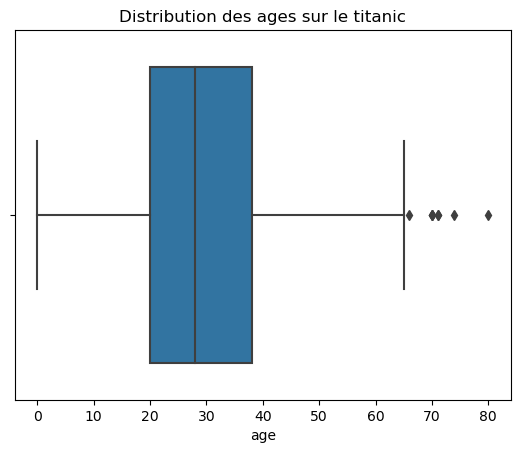

In [11]:
sns.boxplot(x = age)
plt.title("Distribution des ages sur le titanic")
plt.xlabel("age");

### Graphique adapter pour les variables continues

#### Histogramme 

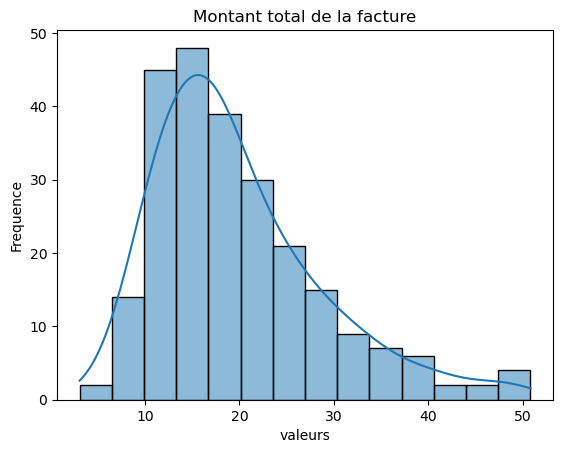

In [12]:
#création d"une variable quantitative continue
quant = tip["total_bill"]
sns.histplot(x = quant, kde = True)
plt.title("Montant total de la facture")
plt.xlabel("valeurs")
plt.ylabel("Frequence");

#### courbe de densité KDE

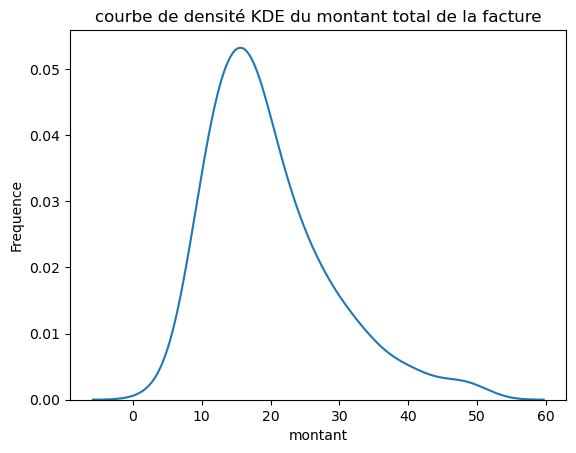

In [13]:
sns.kdeplot(x = quant)
plt.title("courbe de densité KDE du montant total de la facture");
plt.xlabel("montant")
plt.ylabel("Frequence");